<a href="https://colab.research.google.com/github/Fri21/Proyecto-Spotify/blob/main/proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-cloud-bigquery pandas-gbq


In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')



Authenticated


In [3]:
from google.cloud import bigquery
import pandas as pd

In [4]:
project_id = "proyecto-hipotesis-spotify"
dataset = "dataset_spotify"
tabla = "dataset_spotify_03"
client = bigquery.Client(project=project_id)


In [5]:
query = f"""
SELECT *
FROM `{project_id}.{dataset}.{tabla}`
"""
df = client.query(query).to_dataframe()
print(df.head())

  track_id track_name_limpio artist_name_limpio release_date  released_year  \
0  1406287  I Wanna Be Yours     Arctic Monkeys   2013-01-01           2013   
1  3921634       Blank Space       Taylor Swift   2014-01-01           2014   
2  4796316             Style       Taylor Swift   2014-01-01           2014   
3  4527090            Yellow      Chris Molitor   1999-01-01           1999   
4  3126367      Viva La Vida           Coldplay   2008-01-01           2008   

   artist_count  in_spotify_playlists  in_spotify_charts  streams_limpio  bpm  \
0             1                 12859                110      1297026226  135   
1             1                 11434                 53      1355959075   96   
2             1                  7830                 42       786181836   95   
3             1                 31358                 43      1755214421  173   
4             1                 33898                 62      1592909789  138   

   ...  total_playlist  cat_streams  c

In [7]:
df.describe(). T

,count,mean,std,min,25%,50%,75%,max
released_year,948.0,2018.274262,11.032289,1930.0,2020.0,2022.0,2022.0,2023.0
artist_count,948.0,1.559072,0.894481,1.0,1.0,1.0,2.0,8.0
in_spotify_playlists,948.0,5209.739451,7914.448305,31.0,874.5,2216.5,5573.75,52898.0
in_spotify_charts,948.0,12.072785,19.608092,0.0,0.0,3.0,16.0,147.0
streams_limpio,948.0,514336542.001055,567797144.656807,2762.0,141636175.0,289165138.5,672942469.0,3703895074.0
bpm,948.0,122.473629,28.047409,65.0,99.0,120.5,140.0,206.0
danceability_%,948.0,66.971519,14.64671,23.0,57.0,69.0,78.0,96.0
valence_%,948.0,51.39557,23.513789,4.0,32.0,51.0,70.0,97.0
energy_%,948.0,64.258439,16.583591,9.0,53.0,66.0,77.0,97.0
acousticness_%,948.0,27.160338,26.024755,0.0,6.0,18.0,43.0,97.0


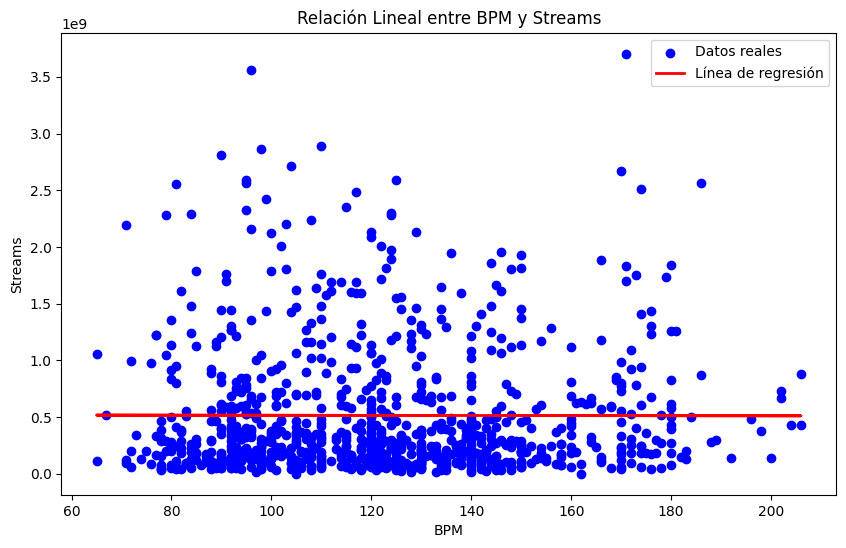

Coeficiente de regresión: -46664.217514090386
Intersección: 520051678.05007744


In [8]:
#hipotesis1
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Verificar la existencia de las columnas 'bpm' y 'streams_limpio' en el DataFrame
if 'bpm' in df.columns and 'streams_limpio' in df.columns:
    # Limpiar los datos, eliminando filas con valores nulos en 'bpm' o 'streams_limpio'
    df_clean = df[['bpm', 'streams_limpio']].dropna()
    # Extraer las variables independientes (X) y dependientes (y)
    X = df_clean[['bpm']].values
    y = df_clean['streams_limpio'].values.reshape(-1, 1)  # Asegurar que y sea un array 2D
    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)
    # Calcular la predicción de 'streams' en función de 'bpm'
    y_pred = model.predict(X)
    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Datos reales')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
    plt.xlabel('BPM')
    plt.ylabel('Streams')
    plt.title('Relación Lineal entre BPM y Streams')
    plt.legend()
    plt.show()
    # Mostrar los coeficientes de la regresión
    print(f'Coeficiente de regresión: {model.coef_[0][0]}')
    print(f'Intersección: {model.intercept_[0]}')
else:
    print("Las columnas 'bpm' y 'streams_limpio' no se encuentran en el DataFrame.")

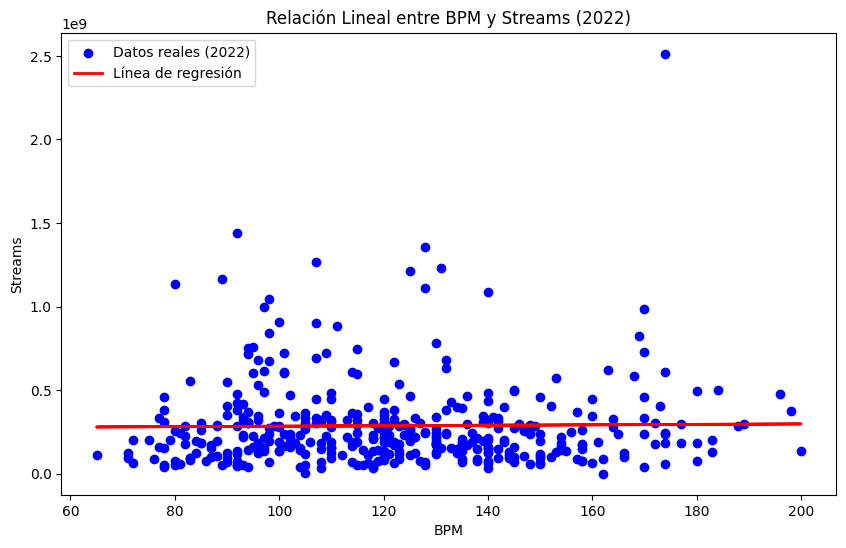

Coeficiente de regresión: 135768.3467750781
Intersección: 270844034.1312893


In [9]:
#hipotesis1-2022
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Supongamos que 'df' es tu DataFrame que contiene los datos de 2022

# Verificar la existencia de las columnas 'bpm' y 'streams_limpio' en el DataFrame
if 'bpm' in df.columns and 'streams_limpio' in df.columns:
    # Filtrar datos solo para el año 2022
    df_2022 = df[df['released_year'] == 2022]
    # Aquí 'año' sería la columna que contiene el año

    # Limpiar los datos, eliminando filas con valores nulos en 'bpm' o 'streams_limpio'
    df_clean = df_2022[['bpm', 'streams_limpio']].dropna()

    # Extraer las variables independientes (X) y dependientes (y)
    X = df_clean[['bpm']].values
    y = df_clean['streams_limpio'].values.reshape(-1, 1)  # Asegurar que y sea un array 2D

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Calcular la predicción de 'streams' en función de 'bpm'
    y_pred = model.predict(X)

    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Datos reales (2022)')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
    plt.xlabel('BPM')
    plt.ylabel('Streams')
    plt.title('Relación Lineal entre BPM y Streams (2022)')
    plt.legend()
    plt.show()

    # Mostrar los coeficientes de la regresión
    print(f'Coeficiente de regresión: {model.coef_[0][0]}')
    print(f'Intersección: {model.intercept_[0]}')

else:
    print("Las columnas 'bpm' y 'streams_limpio' no se encuentran en el DataFrame.")


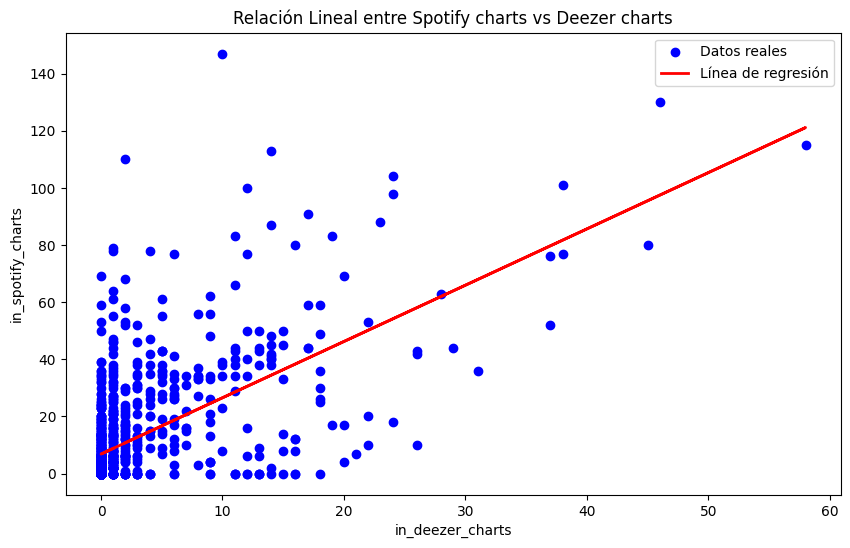

Coeficiente de regresión: 1.9701022462601039
Intersección: 6.835804155511117


In [10]:
#hipotesis2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Verificar la existencia de las columnas 'bpm' y 'streams_limpio' en el DataFrame
if 'in_deezer_charts' in df.columns and 'in_spotify_charts' in df.columns:
    # Limpiar los datos, eliminando filas con valores nulos en 'bpm' o 'streams_limpio'
    df_clean = df[['in_deezer_charts', 'in_spotify_charts']].dropna()
    # Extraer las variables independientes (X) y dependientes (y)
    X = df_clean[['in_deezer_charts']].values
    y = df_clean['in_spotify_charts'].values.reshape(-1, 1)  # Asegurar que y sea un array 2D
    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)
    # Calcular la predicción de 'streams' en función de 'bpm'
    y_pred = model.predict(X)
    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Datos reales')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
    plt.xlabel('in_deezer_charts')
    plt.ylabel('in_spotify_charts')
    plt.title('Relación Lineal entre Spotify charts vs Deezer charts')
    plt.legend()
    plt.show()
    # Mostrar los coeficientes de la regresión
    print(f'Coeficiente de regresión: {model.coef_[0][0]}')
    print(f'Intersección: {model.intercept_[0]}')
else:
    print("Las columnas 'in_deezer_charts' y 'in_spotify_charts' no se encuentran en el DataFrame.")

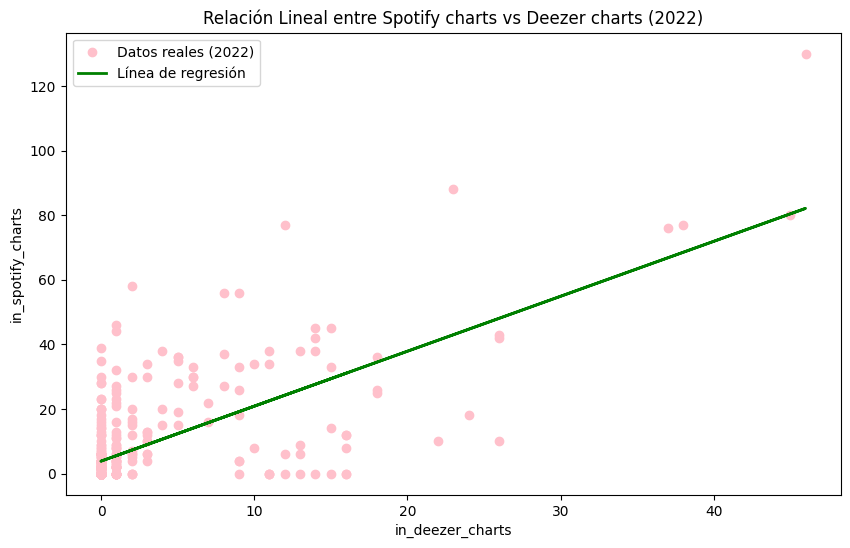

Coeficiente de regresión: 1.7008548856434438
Intersección: 3.846474698208695


In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Supongamos que 'df' es tu DataFrame que contiene los datos de 2022

# Verificar la existencia de las columnas 'in_deezer_charts' y 'in_spotify_charts' en el DataFrame
if 'in_deezer_charts' in df.columns and 'in_spotify_charts' in df.columns:
    # Filtrar datos solo para el año 2022
    df_2022 = df[df['released_year'] == 2022]  # Aquí 'año' sería la columna que contiene el año

    # Limpiar los datos, eliminando filas con valores nulos en 'in_deezer_charts' o 'in_spotify_charts'
    df_clean = df_2022[['in_deezer_charts', 'in_spotify_charts']].dropna()

    # Extraer las variables independientes (X) y dependientes (y)
    X = df_clean[['in_deezer_charts']].values
    y = df_clean['in_spotify_charts'].values.reshape(-1, 1)  # Asegurar que y sea un array 2D

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Calcular la predicción de 'in_spotify_charts' en función de 'in_deezer_charts'
    y_pred = model.predict(X)

    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='pink', label='Datos reales (2022)')
    plt.plot(X, y_pred, color='green', linewidth=2, label='Línea de regresión')
    plt.xlabel('in_deezer_charts')
    plt.ylabel('in_spotify_charts')
    plt.title('Relación Lineal entre Spotify charts vs Deezer charts (2022)')
    plt.legend()
    plt.show()

    # Mostrar los coeficientes de la regresión
    print(f'Coeficiente de regresión: {model.coef_[0][0]}')
    print(f'Intersección: {model.intercept_[0]}')

else:
    print("Las columnas 'in_deezer_charts' y 'in_spotify_charts' no se encuentran en el DataFrame.")


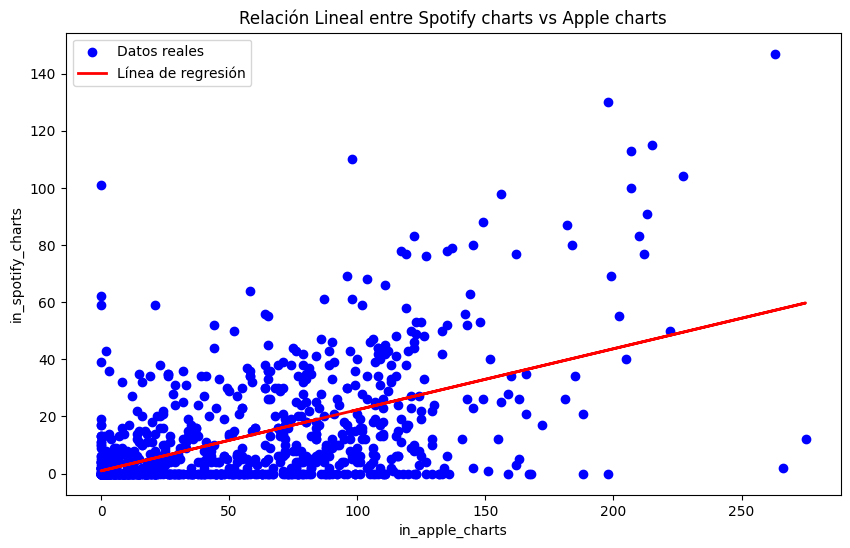

Coeficiente de regresión: 0.21365186379774007
Intersección: 0.9529715614129799


In [12]:
#hipotesis2Apple
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Verificar la existencia de las columnas 'in_apple_charts' y 'in_spotify_charts' en el DataFrame

if 'in_apple_charts' in df.columns and 'in_spotify_charts' in df.columns:

    # Limpiar los datos, eliminando filas con valores nulos en 'in_apple_charts' o 'in_potify_charts'
    df_clean = df[['in_apple_charts', 'in_spotify_charts']].dropna()

    # Extraer las variables independientes (X) y dependientes (y)
    X = df_clean[['in_apple_charts']].values
    y = df_clean['in_spotify_charts'].values.reshape(-1, 1)  # Asegurar que y sea un array 2D

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Calcular la predicción de 'in_spotify_charts' en función de 'in_apple_charts'
    y_pred = model.predict(X)

    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Datos reales')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
    plt.xlabel('in_apple_charts')
    plt.ylabel('in_spotify_charts')
    plt.title('Relación Lineal entre Spotify charts vs Apple charts')
    plt.legend()
    plt.show()

    # Mostrar los coeficientes de la regresión
    print(f'Coeficiente de regresión: {model.coef_[0][0]}')
    print(f'Intersección: {model.intercept_[0]}')
else:
    print("Las columnas 'in_apple_charts' y 'in_spotify_charts' no se encuentran en el DataFrame.")

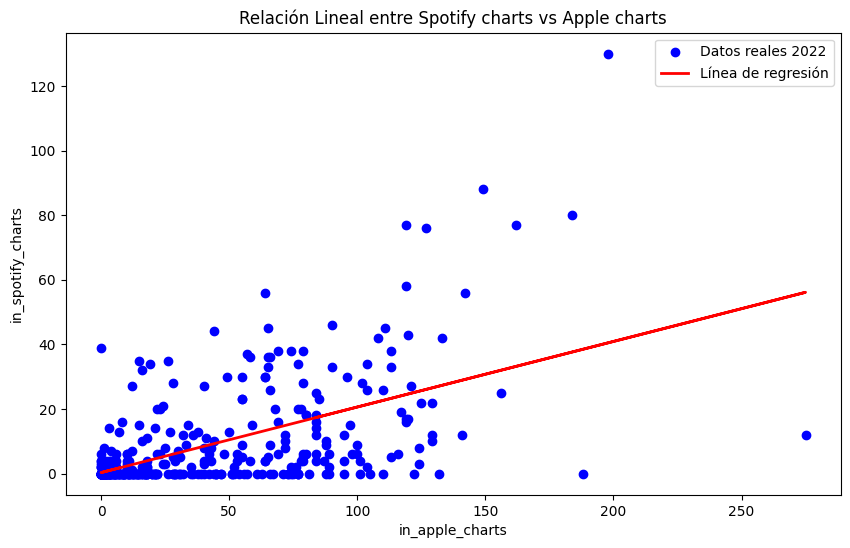

Coeficiente de regresión: 0.20295054274011284
Intersección: 0.3034356187560059


In [13]:
#hipotesis2Apple
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Verificar la existencia de las columnas 'in_apple_charts' y 'in_spotify_charts' en el DataFrame

if 'in_apple_charts' in df.columns and 'in_spotify_charts' in df.columns:

   # Filtrar datos solo para el año 2022
    df_2022 = df[df['released_year'] == 2022]  # Aquí 'año' sería la columna que contiene el año

    # Limpiar los datos, eliminando filas con valores nulos en 'in_apple_charts' o 'in_potify_charts'
    df_clean = df_2022[['in_apple_charts', 'in_spotify_charts']].dropna()

    # Extraer las variables independientes (X) y dependientes (y)
    X = df_clean[['in_apple_charts']].values
    y = df_clean['in_spotify_charts'].values.reshape(-1, 1)  # Asegurar que y sea un array 2D

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Calcular la predicción de 'in_spotify_charts' en función de 'in_apple_charts'
    y_pred = model.predict(X)

    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Datos reales 2022')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
    plt.xlabel('in_apple_charts')
    plt.ylabel('in_spotify_charts')
    plt.title('Relación Lineal entre Spotify charts vs Apple charts')
    plt.legend()
    plt.show()

    # Mostrar los coeficientes de la regresión
    print(f'Coeficiente de regresión: {model.coef_[0][0]}')
    print(f'Intersección: {model.intercept_[0]}')
else:
    print("Las columnas 'in_apple_charts' y 'in_spotify_charts' no se encuentran en el DataFrame.")

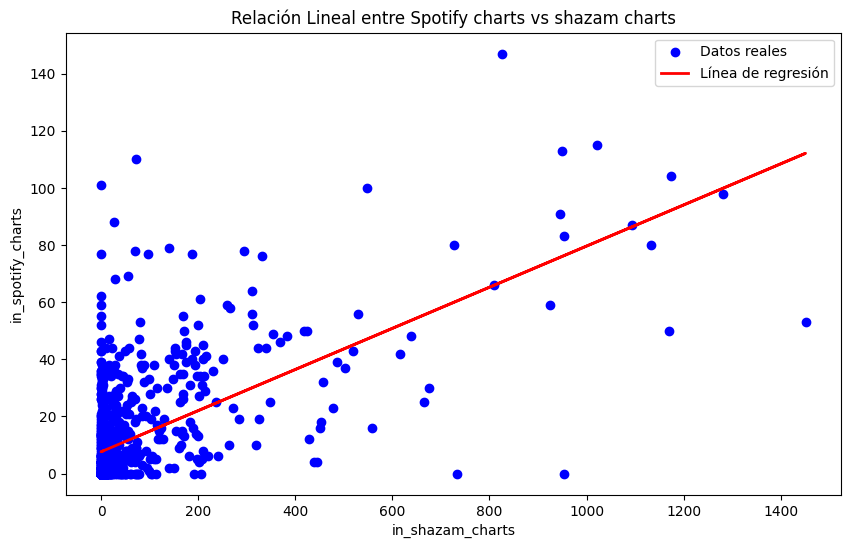

Coeficiente de regresión: 0.07200391593587942
Intersección: 7.623596236690516


In [14]:
#hipotesis2shazam
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Verificar la existencia de las columnas 'in_shazam_charts' y 'in_spotify_charts' en el DataFrame

if 'in_shazam_charts' in df.columns and 'in_spotify_charts' in df.columns:

    # Limpiar los datos, eliminando filas con valores nulos en 'in_shazam_charts' o 'in_potify_charts'
    df_clean = df[['in_shazam_charts', 'in_spotify_charts']].dropna()

    # Extraer las variables independientes (X) y dependientes (y)
    X = df_clean[['in_shazam_charts']].values
    y = df_clean['in_spotify_charts'].values.reshape(-1, 1)  # Asegurar que y sea un array 2D

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Calcular la predicción de 'in_spotify_charts' en función de 'in_shazam_charts'
    y_pred = model.predict(X)

    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Datos reales')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
    plt.xlabel('in_shazam_charts')
    plt.ylabel('in_spotify_charts')
    plt.title('Relación Lineal entre Spotify charts vs shazam charts')
    plt.legend()
    plt.show()

    # Mostrar los coeficientes de la regresión
    print(f'Coeficiente de regresión: {model.coef_[0][0]}')
    print(f'Intersección: {model.intercept_[0]}')
else:
    print("Las columnas 'in_shazam_charts' y 'in_spotify_charts' no se encuentran en el DataFrame.")

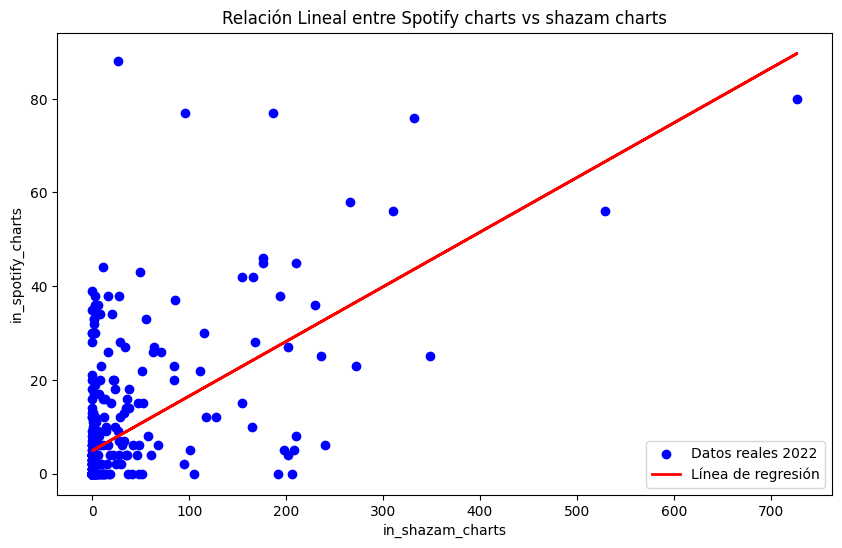

Coeficiente de regresión: 0.11658878795283685
Intersección: 4.885099890716573


In [15]:
#hipotesis2shazam
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Verificar la existencia de las columnas 'in_shazam_charts' y 'in_spotify_charts' en el DataFrame

if 'in_shazam_charts' in df.columns and 'in_spotify_charts' in df.columns:

   # Filtrar datos solo para el año 2022
    df_2022 = df[df['released_year'] == 2022]  # Aquí 'año' sería la columna que contiene el año

    # Limpiar los datos, eliminando filas con valores nulos en 'in_shazam_charts' o 'in_potify_charts'
    df_clean = df_2022[['in_shazam_charts', 'in_spotify_charts']].dropna()

    # Extraer las variables independientes (X) y dependientes (y)
    X = df_clean[['in_shazam_charts']].values
    y = df_clean['in_spotify_charts'].values.reshape(-1, 1)  # Asegurar que y sea un array 2D

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Calcular la predicción de 'in_spotify_charts' en función de 'in_shazam_charts'
    y_pred = model.predict(X)

    # Visualización de los resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Datos reales 2022')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
    plt.xlabel('in_shazam_charts')
    plt.ylabel('in_spotify_charts')
    plt.title('Relación Lineal entre Spotify charts vs shazam charts')
    plt.legend()
    plt.show()

    # Mostrar los coeficientes de la regresión
    print(f'Coeficiente de regresión: {model.coef_[0][0]}')
    print(f'Intersección: {model.intercept_[0]}')
else:
    print("Las columnas 'in_shazam_charts' y 'in_spotify_charts' no se encuentran en el DataFrame.")